# Agri-Insights aims to create a decision-support tool that combines the Environmental Performance Index (EPI) data (1995-2022) 
    NASA's Earth Observation data to help farmers, researchers, and policymakers make informed agricultural decisions. Our platform will provide:

In [2]:
import pandas as pd  
import os 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
Epi_row = os.listdir('./')[0]
folder_path = os.path.join(Epi_row,os.listdir(Epi_row)[0])
files_path = os.listdir(folder_path)
file = []
for path in files_path:
    dir = os.path.join(folder_path,path)  
    file.append(dir)
len(file)

40

In [4]:
excel_path = os.path.join(Epi_row,os.listdir(Epi_row)[2])
indicator = pd.read_excel(excel_path)

In [5]:
file_name = [name.split('_')[0] for name in files_path]

In [6]:
excel_path1 = os.path.join(Epi_row,os.listdir(Epi_row)[3])
Epi = pd.read_excel(excel_path1)

In [7]:
dataset = pd.DataFrame([])
for i, data_src in enumerate(file):
    df = pd.read_csv(data_src)
    df.columns = [name.split('.')[-1] if len(name.split('.')) >1 else name  for name in df.columns ]
    data = Epi[Epi['TLA.1']==file_name[i]]
    df['Policy_objective'] = data['Policy Objective'].values[0]
    df['issue_cat'] = data['Issue Category'].values[0]
    df['issue_tla'] = data['TLA'].values[0]
    df['issue_weight'] = data['Wt.'].values[0]*100
    df['indicator'] = data['Indicator'].values[0]
    df['TLA'] = data['TLA.1'].values[0]
    df['weight_ind'] = data['Wt..1'].values[0]*100
    dataset = pd.concat([dataset,df],axis=0, ignore_index=True)

In [8]:
df_long = pd.melt(dataset,id_vars=['code', 'iso', 'country','Policy_objective', 'issue_cat','issue_tla', 'issue_weight', 'indicator', 'TLA', 'weight_ind'], var_name='year',value_name='Epi_value')
df_long['year'] = df_long['year'].astype(int)
df_long.dropna(axis=0,inplace=True)

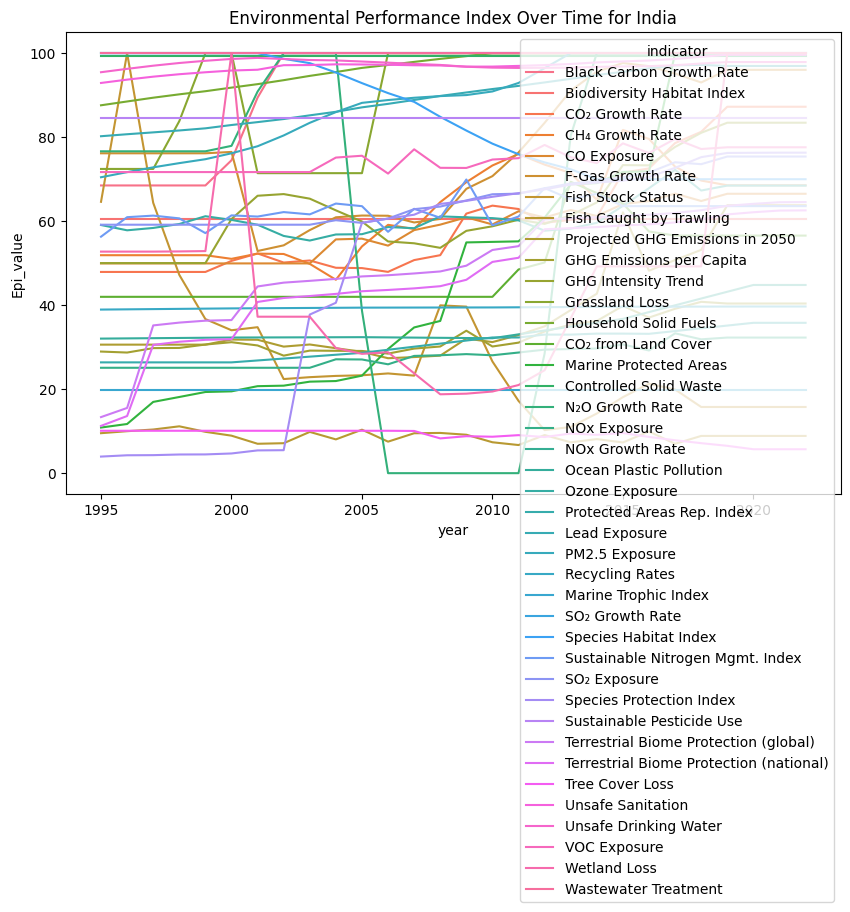

In [83]:
# Filter for a specific country, e.g., India
df_india = df_long[df_long['country'] == 'Sweden']

# Plot the EPI trend over the years for India
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_india, x='year', y='Epi_value', hue='indicator')
plt.title('Environmental Performance Index Over Time for India')
plt.xlabel('year')
plt.ylabel('Epi_value')
plt.show()


In [9]:
useful_tla = [
    "CDA", "CHA", "NDA", "GIB", "GHP", 
    "SNM", "SPU", "WWT", 
    "MSW", "REC", "OCP", "TCL", 
    "WTL", "FSS", "SHI", "BHV", 
    "BCA", "FGA", "PMD", "UWD", 
    "HAD", "RMS", "TBG", "TBN"
]


In [10]:
filter_data = df_long[df_long['TLA'].isin(useful_tla)]

In [90]:
summary = filter_data.groupby('indicator')['Epi_value'].mean().reset_index()
summary

,indicator,Epi_value
0,Biodiversity Habitat Index,47.196118
1,Black Carbon Growth Rate,58.536712
2,CH₄ Growth Rate,39.878199
3,CO₂ Growth Rate,33.734748
4,Controlled Solid Waste,43.336841
5,F-Gas Growth Rate,46.837570
6,Fish Stock Status,37.288662
7,GHG Emissions per Capita,51.163892
8,GHG Intensity Trend,48.826177
9,Household Solid Fuels,39.639873


Best Indicator: Species Habitat Index with Epi_value: 83.03360197042699
Worst Indicator: Recycling Rates with Epi_value: 19.051904761904762


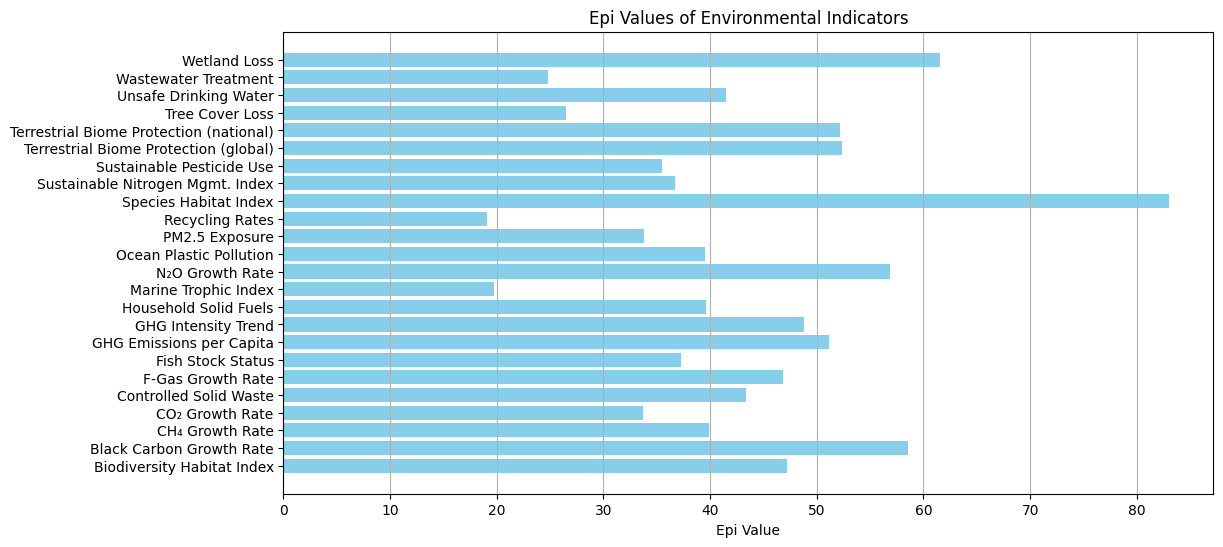

In [94]:
best_indicator = summary.loc[summary['Epi_value'].idxmax()]
worst_indicator = summary.loc[summary['Epi_value'].idxmin()]

print(f"Best Indicator: {best_indicator['indicator']} with Epi_value: {best_indicator['Epi_value']}")
print(f"Worst Indicator: {worst_indicator['indicator']} with Epi_value: {worst_indicator['Epi_value']}")

plt.figure(figsize=(12, 6))
plt.barh(summary['indicator'], summary['Epi_value'], color='skyblue')
plt.xlabel('Epi Value')
plt.title('Epi Values of Environmental Indicators')
plt.grid(axis='x')
plt.show()

In [123]:
country_summary = filter_data.groupby(['country','year'])[['Epi_value']].mean().reset_index()

# Display the summary
filter_2022 = country_summary[country_summary['year']==2022]

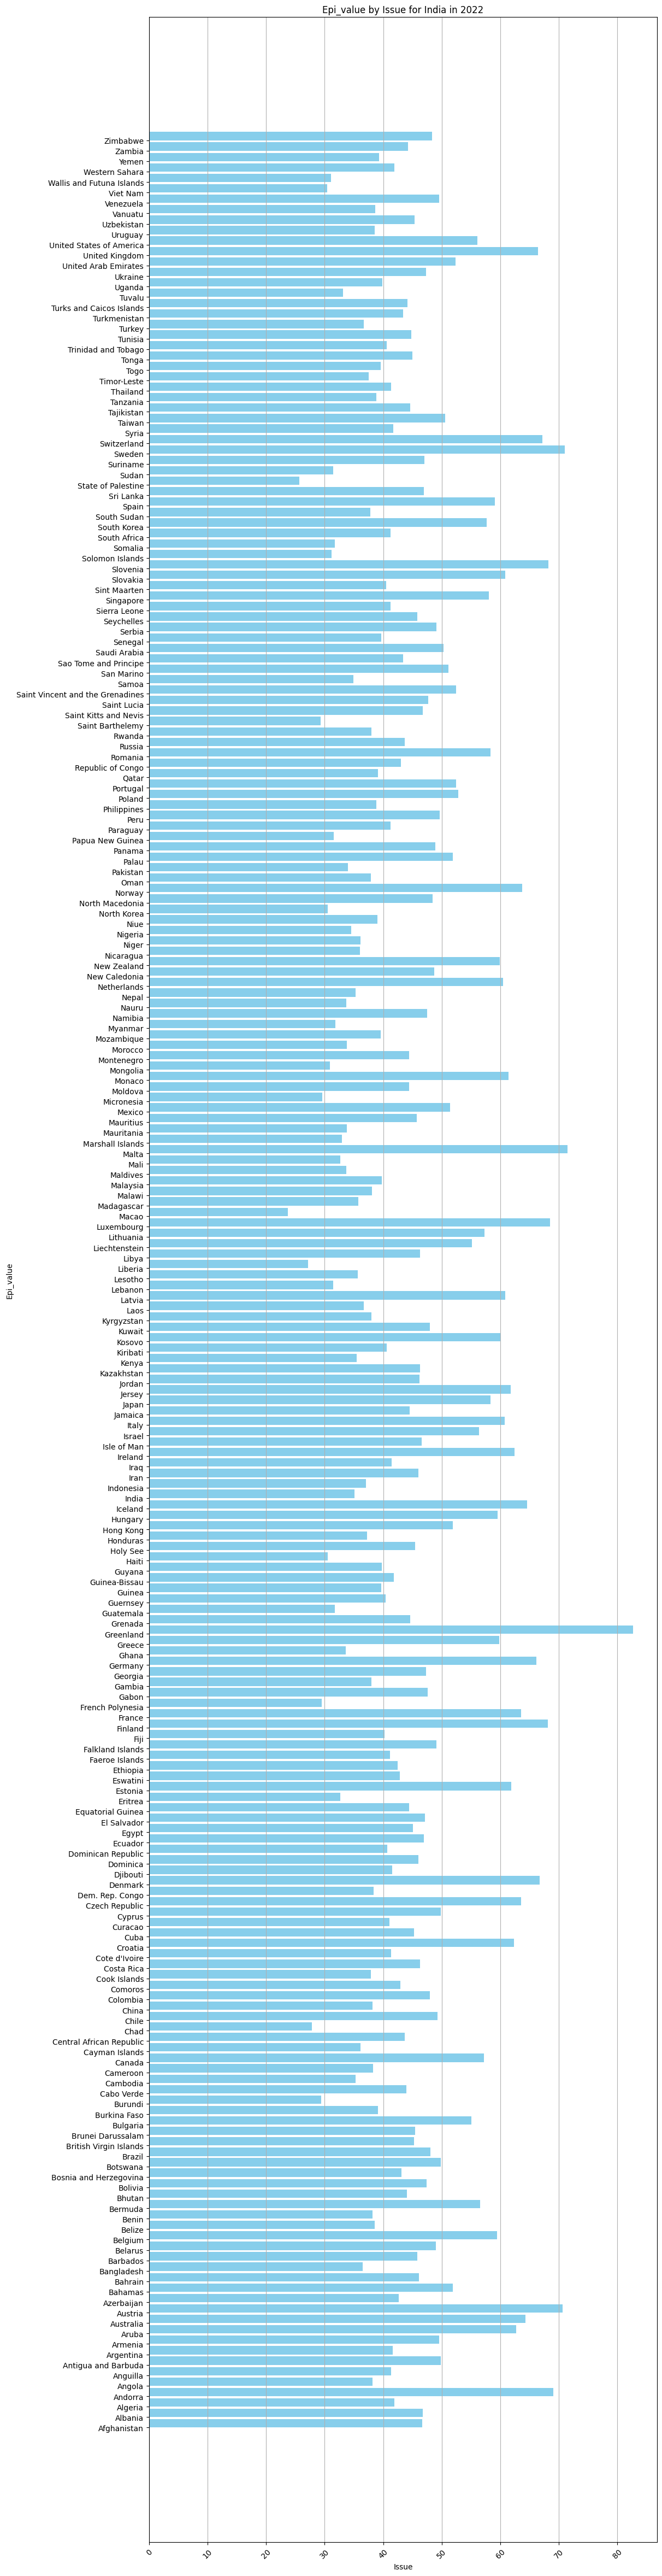

In [130]:
plt.figure(figsize=(12,60))
plt.barh(filter_2022['country'],filter_2022['Epi_value'],align='edge',color='skyblue')
plt.title('Epi_value by Issue for India in 2022')
plt.xlabel('Issue')
plt.ylabel('Epi_value')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

<Axes: xlabel='year', ylabel='Epi_value'>

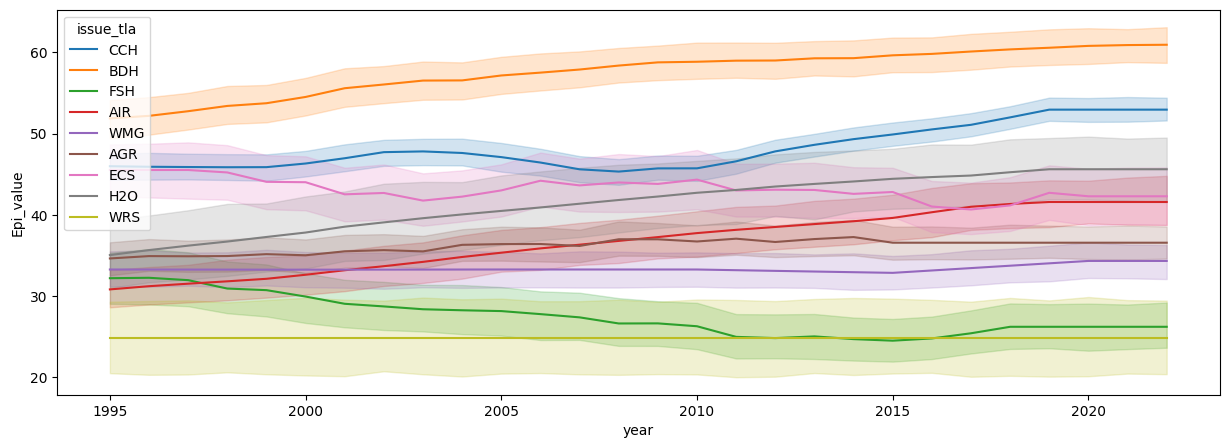

In [136]:
contry_data = filter_data[filter_data['country']=='India']
plt.figure(figsize=(15,5))
sns.lineplot(x='year',y='Epi_value', hue='issue_tla',data=filter_data)

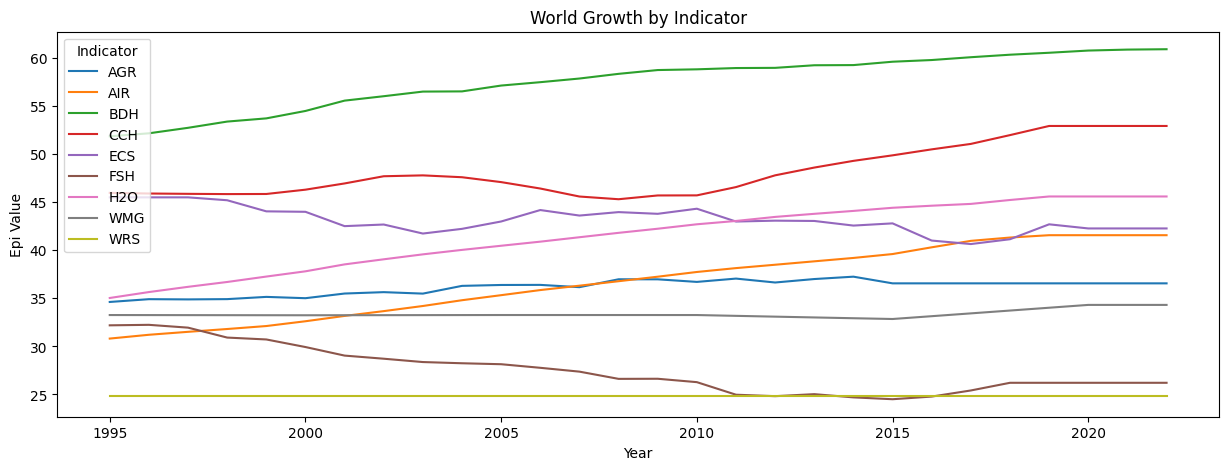

In [140]:
world_summary = filter_data.groupby(['issue_tla','year'])[['Epi_value']].mean().reset_index()
plt.figure(figsize=(15, 5))
sns.lineplot(data=world_summary, x='year', y='Epi_value', hue='issue_tla')
plt.title('World Growth by Indicator')
plt.xlabel('Year')
plt.ylabel('Epi Value')
plt.legend(title='Indicator')
plt.show()

In [142]:
overall_summary = filter_data.groupby('issue_tla')['Epi_value'].agg(['mean', 'median', 'min', 'max']).reset_index()
overall_summary

,issue_tla,mean,median,min,max
0,AGR,36.162014,34.062356,0.0,99.476619
1,AIR,36.730114,32.449554,0.0,100.000000
2,BDH,57.537486,56.912190,0.0,100.000000
3,CCH,48.185839,47.445373,0.0,100.000000
4,ECS,43.168651,31.345536,0.0,100.000000
5,FSH,27.515308,17.572154,0.0,100.000000
6,H2O,41.476831,41.391261,0.0,100.000000
7,WMG,33.373285,25.021000,0.0,100.000000
8,WRS,24.821524,7.174400,0.0,100.000000


In [143]:
best_indicator = overall_summary.loc[overall_summary['mean'].idxmax()]
worst_indicator = overall_summary.loc[overall_summary['mean'].idxmin()]


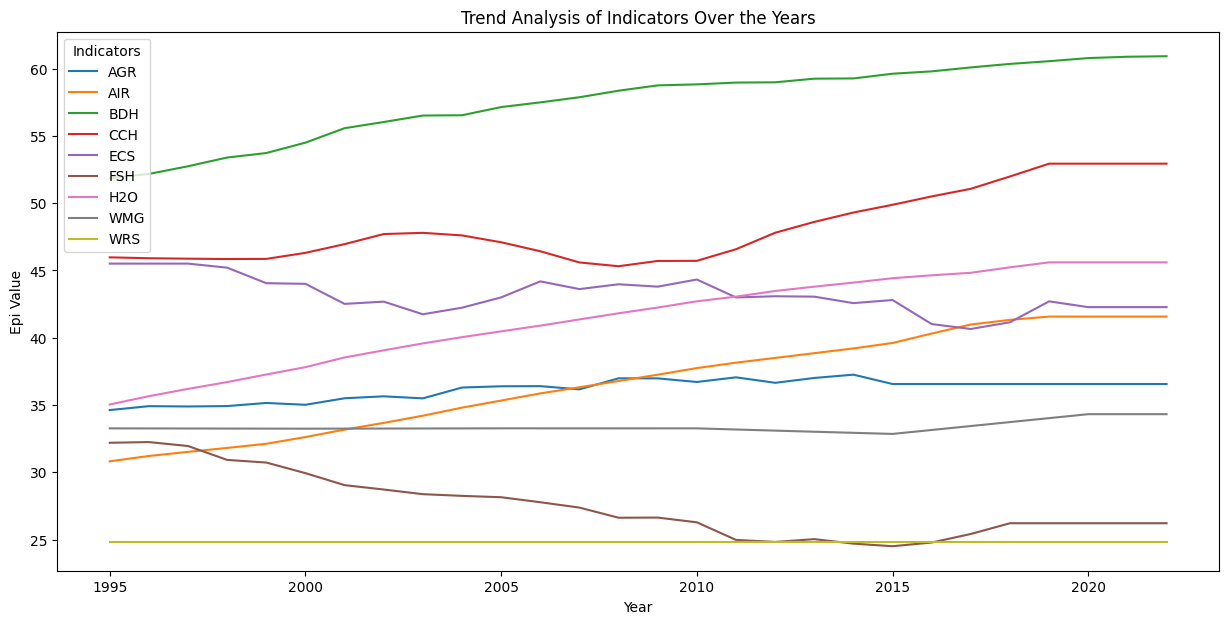

In [144]:
trend_analysis = filter_data.groupby(['year', 'issue_tla'])['Epi_value'].mean().unstack()
trend_analysis.plot(figsize=(15, 7))
plt.title('Trend Analysis of Indicators Over the Years')
plt.ylabel('Epi Value')
plt.xlabel('Year')
plt.legend(title='Indicators')
plt.show()


In [145]:
country_performance = filter_data.groupby(['country', 'issue_tla'])['Epi_value'].mean().reset_index()
country_performance

,country,issue_tla,Epi_value
0,Afghanistan,AGR,43.215988
1,Afghanistan,AIR,14.317185
2,Afghanistan,BDH,36.792682
3,Afghanistan,CCH,41.552166
4,Afghanistan,ECS,71.850316
...,...,...,...
1801,Zimbabwe,CCH,56.924633
1802,Zimbabwe,ECS,37.017126
1803,Zimbabwe,H2O,14.503160
1804,Zimbabwe,WMG,15.187321


In [151]:
filter_data.columns

Index(['code', 'iso', 'country', 'Policy_objective', 'issue_cat', 'issue_tla',
       'issue_weight', 'indicator', 'TLA', 'weight_ind', 'year', 'Epi_value'],
      dtype='object')

                       country  Epi_value
0                  Afghanistan  34.219431
1                      Albania  41.853435
2                      Algeria  41.928313
3                      Andorra  65.662697
4                       Angola  34.072854
..                         ...        ...
215  Wallis and Futuna Islands  31.431807
216             Western Sahara  39.523335
217                      Yemen  35.591398
218                     Zambia  45.980474
219                   Zimbabwe  48.193052

[220 rows x 2 columns]


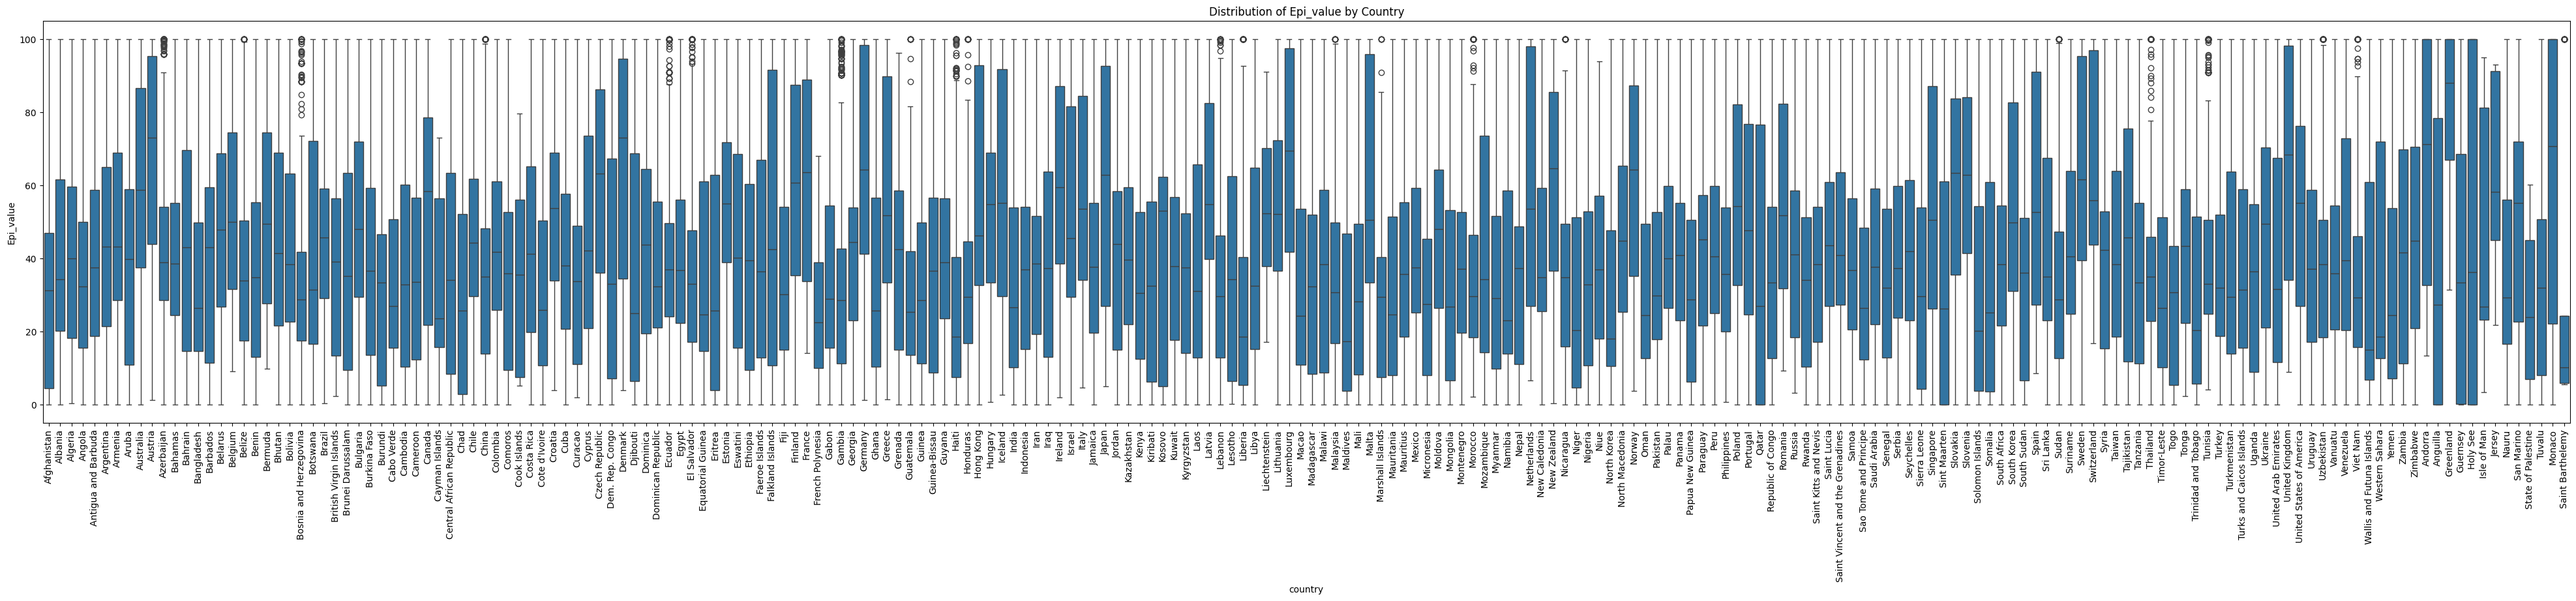

In [157]:
country_summary = filter_data.groupby('country')['Epi_value'].mean().reset_index()
print(country_summary)

# Step 3: Visualize the distribution of Epi_value by country
plt.figure(figsize=(50, 8))
sns.boxplot(x='country', y='Epi_value', data=filter_data)
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.title('Distribution of Epi_value by Country')
plt.show()

In [160]:
filter_data.head(5)

,code,iso,country,Policy_objective,issue_cat,issue_tla,issue_weight,indicator,TLA,weight_ind,year,Epi_value,Epi_value_lag1,Epi_value_lag2
0,4,AFG,Afghanistan,Climate Change PCC (38%),Climate Change Mitigation,CCH,100.0,Black Carbon Growth Rate,BCA,2.6,1995,15.772571,NaN,NaN
1,8,ALB,Albania,Climate Change PCC (38%),Climate Change Mitigation,CCH,100.0,Black Carbon Growth Rate,BCA,2.6,1995,100.000000,15.772571,NaN
2,12,DZA,Algeria,Climate Change PCC (38%),Climate Change Mitigation,CCH,100.0,Black Carbon Growth Rate,BCA,2.6,1995,69.090971,100.000000,15.772571
4,24,AGO,Angola,Climate Change PCC (38%),Climate Change Mitigation,CCH,100.0,Black Carbon Growth Rate,BCA,2.6,1995,53.762469,69.090971,100.000000
6,28,ATG,Antigua and Barbuda,Climate Change PCC (38%),Climate Change Mitigation,CCH,100.0,Black Carbon Growth Rate,BCA,2.6,1995,51.461840,53.762469,69.090971


In [163]:
X = filter_data[['code', 'TLA', 'issue_tla', 'year']]  # Use country code directly
y = filter_data['Epi_value']

In [164]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(), ['TLA', 'issue_tla']),  # Encode TLA and issue_tla
#     ],
#     remainder='passthrough'  # Leave other columns unchanged (country_code and year)
# )

# model_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', RandomForestRegressor())  # You can change this to any regression model
# ])

# model_pipeline.fit(X_train, y_train)

# # Step 6: Make predictions and evaluate the model
# y_pred = model_pipeline.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

Mean Squared Error: 25.39991340326568


    Mean Squared Error: 25.39991340326568

In [172]:
# print('training score : ',model_pipeline.score(X_train,y_train)*100)
# print('testing score : ',model_pipeline.score(X_test,y_test)*100)


training score :  99.61648716851523
testing score :  97.2607590748552


    training score :  99.61648716851523
    testing score :  97.2607590748552

In [180]:
# # पूर्ण डेटा सेट पर मॉडल को फिट करें ताकि फीचर महत्व निकाला जा सके
# model_pipeline.fit(X, y)

# # पाइपलाइन से मॉडल प्राप्त करें
# model = model_pipeline.named_steps['model']

# # OneHotEncoder से फीचर नाम प्राप्त करें
# feature_names = model_pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(input_features=['TLA', 'issue_tla'])

# # अन्य फीचर नामों के साथ संयोजित करें
# all_feature_names = np.concatenate([feature_names, ['country_code', 'year']])

# # फीचर महत्व के लिए DataFrame बनाएं
# importances = model.feature_importances_
# feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# print(feature_importance_df)


In [177]:
# अन्य फीचर नामों के साथ संयोजित करें
all_feature_names = np.concatenate([feature_names, ['country_code', 'year']])

# फीचर महत्व के लिए DataFrame बनाएं
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)



In [178]:
# import joblib
# joblib.dump(model_pipeline, 'trained_model.pkl')  # Save model


['trained_model.pkl']

In [188]:
filter_data.head()

,code,iso,country,Policy_objective,issue_cat,issue_tla,issue_weight,indicator,TLA,weight_ind,year,Epi_value,Epi_value_lag1,Epi_value_lag2
0,4,AFG,Afghanistan,Climate Change PCC (38%),Climate Change Mitigation,CCH,100.0,Black Carbon Growth Rate,BCA,2.6,1995,15.772571,NaN,NaN
1,8,ALB,Albania,Climate Change PCC (38%),Climate Change Mitigation,CCH,100.0,Black Carbon Growth Rate,BCA,2.6,1995,100.000000,15.772571,NaN
2,12,DZA,Algeria,Climate Change PCC (38%),Climate Change Mitigation,CCH,100.0,Black Carbon Growth Rate,BCA,2.6,1995,69.090971,100.000000,15.772571
4,24,AGO,Angola,Climate Change PCC (38%),Climate Change Mitigation,CCH,100.0,Black Carbon Growth Rate,BCA,2.6,1995,53.762469,69.090971,100.000000
6,28,ATG,Antigua and Barbuda,Climate Change PCC (38%),Climate Change Mitigation,CCH,100.0,Black Carbon Growth Rate,BCA,2.6,1995,51.461840,53.762469,69.090971


In [11]:
country_list = filter_data.groupby(['code','country'])['Epi_value'].mean().reset_index()
country_list[['code','country']].to_csv('country.csv', index=False)
indicator_list = filter_data.groupby(['TLA','indicator','issue_tla','issue_cat'])['Epi_value'].mean().reset_index()
indicator_list[['TLA','indicator','issue_tla','issue_cat']].to_csv('indicator.csv', index=False)


In [12]:
indicator_list

,TLA,indicator,issue_tla,issue_cat,Epi_value
0,BCA,Black Carbon Growth Rate,CCH,Climate Change Mitigation,58.536712
1,BHV,Biodiversity Habitat Index,BDH,Biodiversity & Habitat,47.196118
2,CDA,CO₂ Growth Rate,CCH,Climate Change Mitigation,33.734748
3,CHA,CH₄ Growth Rate,CCH,Climate Change Mitigation,39.878199
4,FGA,F-Gas Growth Rate,CCH,Climate Change Mitigation,46.837570
5,FSS,Fish Stock Status,FSH,Fisheries,37.288662
6,GHP,GHG Emissions per Capita,CCH,Climate Change Mitigation,51.163892
7,GIB,GHG Intensity Trend,CCH,Climate Change Mitigation,48.826177
8,HAD,Household Solid Fuels,AIR,Air Quality,39.639873
9,MSW,Controlled Solid Waste,WMG,Waste Management,43.336841


In [20]:
code = country_list['code'].unique()
country = country_list['country'].unique()
tla = indicator_list['TLA'].unique()
indicator = indicator_list['indicator'].unique()
issue_tla = indicator_list['issue_tla'].tolist()


In [21]:
issue_tla

['CCH',
 'BDH',
 'CCH',
 'CCH',
 'CCH',
 'FSH',
 'CCH',
 'CCH',
 'AIR',
 'WMG',
 'CCH',
 'WMG',
 'AIR',
 'WMG',
 'FSH',
 'BDH',
 'AGR',
 'AGR',
 'BDH',
 'BDH',
 'ECS',
 'H2O',
 'ECS',
 'WRS']

In [19]:

country_data = pd.read_csv('country.csv')
indicator_data = pd.read_csv('.csv')

# code = country_data['code'].unique()
# country = country_data['country'].unique()
# tla = indicator_data['TLA'].unique()
# indicator = indicator_data['indicator'].unique()

indicator_data

,code,country
0,4,Afghanistan
1,8,Albania
2,12,Algeria
3,20,Andorra
4,24,Angola
...,...,...
215,862,Venezuela
216,876,Wallis and Futuna Islands
217,882,Samoa
218,887,Yemen


In [24]:
pd.DataFrame([{'country': '4', 'tla': 'BCA', 'issue_tla': 'CCH', 'year': '2022'}])

,country,tla,issue_tla,year
0,4,BCA,CCH,2022
